# Ford GoBike Data Visualisation

## Table of Contents
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

<a id='gather'></a>
## Part I - Gathering Data

This document explores a dataset containing ride data and attributes for approximately 1,863,721 individual rides on Ford's GoBike system for all of 2018. 


</n>




### Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Loading Datasets (12 months for 2018)

In [20]:
df_1 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_2 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_3 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_4 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_5 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_6 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_7= pd.read_csv('201807-fordgobike-tripdata.csv')
df_8 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_9 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_10 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_11 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_12 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [21]:
# visually assess data
df_2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


**What is the structure of the dataset?**

My data is made up of 1,863,721 individual GoBike rides, a rentable bicyle service in San Francisco, for the year 2018. 

Data includes 14 columns/feautures: 
- ride duration in seconds
- ride start & end time, station id's, station locations and station names
- user type (customer or subscriber)
- unique bike id's
- whether the user used the bike share for the whole trip.

**What are the main features of interest in the dataset?**

I'm most interested in figuring out what changes occur over the time-series for the 12 months given. This system was in its infancy at this time so changes in rides numbers and other factors during the course of the year would be very revealing as to the success of the model.

I'm also interested in seeing the effect that climate has on the number and duration's of rides. For example, perhaps in winter the ride #'s go well down during those months.

**What features in the dataset will help support an investigation into the features of interest?**

I expect that ride duration as well as a simple ride count will be two big factors in most analysis. These are the two KPI's for a ride sharing system such as GoBike. 

I could also potentially create a new variable based off the ride duration metric that shows the cost of each ride. The cost of a Ford GoBike is readily available and it would enable a new 'revenue' angle to look at the dataset with.

Single rides cost 2 dollars per trip, day passes cost 10 dollars per day, and memberships cost 15 dollars per month or 149 dollars per year. Therefore could divide the dataset into customers and subscribers to find revenue.

<a id='assess'></a>
## Part II - Assessing Data

In [23]:
df_1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [26]:
# check dataframe info is the same across all months
df_8.info(), df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192162 entries, 0 to 192161
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             192162 non-null  int64  
 1   start_time               192162 non-null  object 
 2   end_time                 192162 non-null  object 
 3   start_station_id         189250 non-null  float64
 4   start_station_name       189250 non-null  object 
 5   start_station_latitude   192162 non-null  float64
 6   start_station_longitude  192162 non-null  float64
 7   end_station_id           189250 non-null  float64
 8   end_station_name         189250 non-null  object 
 9   end_station_latitude     192162 non-null  float64
 10  end_station_longitude    192162 non-null  float64
 11  bike_id                  192162 non-null  int64  
 12  user_type                192162 non-null  object 
 13  bike_share_for_all_trip  192162 non-null  object 
dtypes: f

(None, None)

In [29]:
# Check if duplicates exist
df_8.duplicated().sum(), df_2.duplicated().sum(), df_10.duplicated().sum()

(0, 0, 0)

**Quality Issues:**

- the 12 months dataframes are separated
- start/end time variables in type object 
- missing data from start_station_id, start_station_name, end_station_name
- no 'month' variable for time-series analysis
- member birth year has dates prior to 1900
- can calculate the age of the user
- can add month, day, hour, weekday details

<a id='clean'></a>
## Part III - Cleaning Data

**Define:**
- Concatenate 12 separate dataframes into 1 single '2018' table

**Code:**

In [41]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
df = pd.concat(frames)
df_clean = df.copy()

**Test:**

In [42]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No


In [43]:
# check for new shape
df_clean.shape

(1863721, 14)

In [44]:
# check for correct shape
df_1.shape[0] + df_2.shape[0] + df_3.shape[0] + df_4.shape[0] + df_5.shape[0] + df_6.shape[0] + df_7.shape[0] + df_8.shape[0] + df_9.shape[0] + df_10.shape[0] + df_11.shape[0] + df_12.shape[0]

1863721

**Define:**

- Change start/end time variables from type object to datetime

**Code:**

In [45]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

**Test:**

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 213.3+ MB


In [47]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No


**Define:**
- Remove negligible rows with missing values

**Code:**

In [48]:
df_clean = df_clean.dropna()

**Test:**

In [49]:
df_clean.isna().sum(), df_clean.shape[0]

(duration_sec               0
 start_time                 0
 end_time                   0
 start_station_id           0
 start_station_name         0
 start_station_latitude     0
 start_station_longitude    0
 end_station_id             0
 end_station_name           0
 end_station_latitude       0
 end_station_longitude      0
 bike_id                    0
 user_type                  0
 bike_share_for_all_trip    0
 dtype: int64,
 1851950)

**Define:**
- create month variable based on start time column

**Code:**

In [50]:
df_clean['month'] = pd.DatetimeIndex(df_clean['start_time']).month

**Test:**

In [51]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,1


In [52]:
df_clean.month.value_counts()

10    200102
7     196038
6     193907
8     189250
9     184635
5     179125
11    133651
12    131171
4     131169
3     111382
2     106718
1      94802
Name: month, dtype: int64

**Define:**

- create day of the week & time of the day columns

**Code:**

In [54]:
# extract month name
df_clean['start_time_month_name'] = df_clean['start_time'].dt.strftime('%B')

In [57]:
# extract day of the week
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

In [58]:
# extract time of day starting time
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

**Test:**

In [62]:
df_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,start_time_month_name,start_time_weekday,start_time_hour
131358,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No,12,December,Sat,0
131359,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No,12,December,Sat,0
131360,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No,12,December,Sat,0
131361,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No,12,December,Sat,0
131362,150,2018-12-01 00:03:05.742,2018-12-01 00:05:36.026,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,No,12,December,Sat,0


In [63]:
df_clean.to_csv('df_clean.csv')

<a id='uni'></a>
# Univariate Exploration

I'll begin by looking at the most important metric, **distribution of ride duration.**

(array([1.841546e+06, 6.059000e+03, 1.545000e+03, 6.890000e+02,
        4.410000e+02, 3.980000e+02, 4.010000e+02, 3.440000e+02,
        2.990000e+02, 2.280000e+02]),
 array([6.10000e+01, 8.69150e+03, 1.73220e+04, 2.59525e+04, 3.45830e+04,
        4.32135e+04, 5.18440e+04, 6.04745e+04, 6.91050e+04, 7.77355e+04,
        8.63660e+04]),
 <a list of 10 Patch objects>)

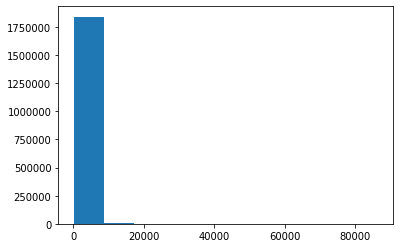

In [64]:
# general hist for ride duration 
plt.hist(data = df_clean, x = 'duration_sec')

Text(0.5, 1.0, 'Distribution of Ride Durations')

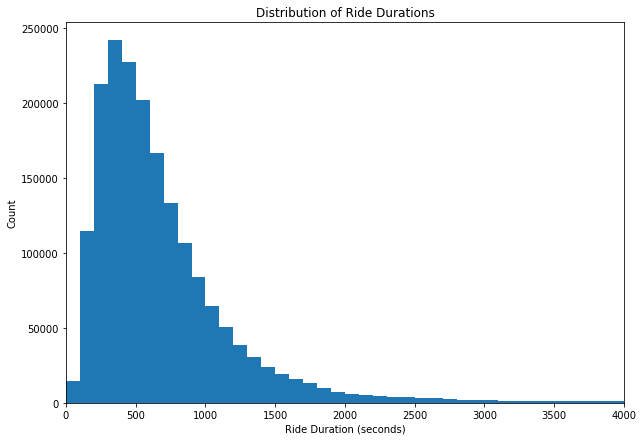

In [65]:
# polished and adjusted to zoom in on most important area
plt.figure(figsize=(10, 7))

bins = np.arange(0, df_clean.duration_sec.max()+10, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlim((0,4000))
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Ride Durations')

In [66]:
# percentage of rides that are over an hour
((df_clean[df_clean['duration_sec'] > 3600]).shape[0] / df_clean.shape[0]) * 100

1.677907070925241

In [67]:
# percentage of rides that are under 30 minutes
((df_clean[df_clean['duration_sec'] < 1800]).shape[0] / df_clean.shape[0]) * 100

94.96460487594157

In [68]:
# ride duration mean
df_clean.duration_sec.mean()

852.9993698533978

In [69]:
# percentage of rides that are under the mean
((df_clean[df_clean['duration_sec'] < 853]).shape[0] / df_clean.shape[0]) * 100

74.0308323658846

**Fat tailed distribution**

- The distribution of ride duration time is highly right skewed.

- 74% of the rides take less than the mean (average) time. 

- A small group of extremely long ride outliers are skewing the data right.

Text(0.5, 0, 'Ride Duration (seconds)')

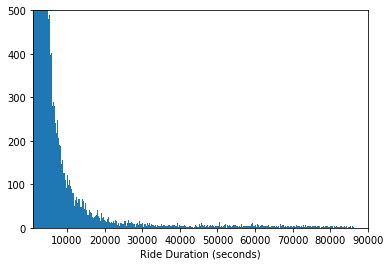

In [70]:
# to show 'fat tail' of ride duration
bins = np.arange(0, df_clean.duration_sec.max()+10, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlim((1000,90000))
plt.ylim((0, 500))
plt.xlabel('Ride Duration (seconds)')

In [71]:
# querying for the longest ride
df_clean['duration_sec'].max()

86366

In [72]:
86400 - 86366

34

**Interesting**

- There are only 86,400 seconds in a day. 

- Therefore the rider from the longest ride observation activated their bike at exactly 34 seconds after midnight and kept it the entire day.

### Effect of time of day on ride count

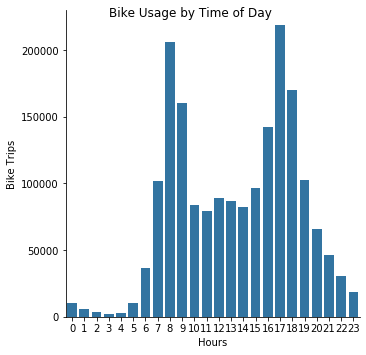

In [96]:
base_color = sb.color_palette()[0]
g = sb.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "Bike Trips")
g.fig.suptitle('Bike Usage by Time of Day');

**Clearly this is a bimodal distribution around 8am & 5pm**

- Would make perfect sense as these peaks are right before and after normal working hours. People are riding them to and from work.

### Effect of day of the week on ride count

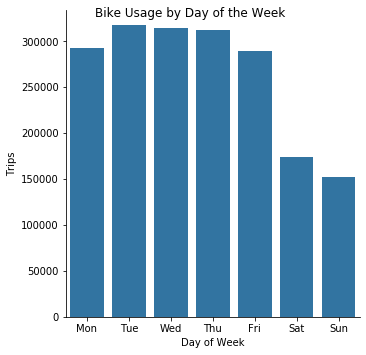

In [83]:
# day of the week usage
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Day of Week", "Trips")
g.fig.suptitle('Bike Usage by Day of the Week');

**No significant change throughout the weekdays but a severe dropoff on the weekends**

- Again this is an indicator that a large proportion of riders are using the bikes for work commutes.

### Breakdown by User Type

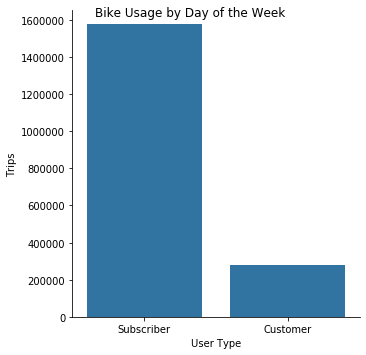

In [84]:
# ride counts broken down into subscribers or customers
g = sb.catplot(data=df_clean, x='user_type', kind='count', color = base_color)
g.set_axis_labels("User Type", "Trips")
g.fig.suptitle('Bike Usage by Day of the Week');

Text(0.5, 1.0, 'Percentage of Rides')

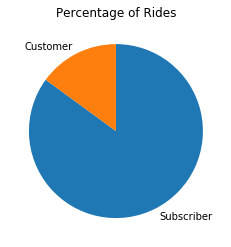

In [85]:
# pie chart to further elucidate ridership breakdown
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90,
       counterclock=False)
plt.title('Percentage of Rides')

In [86]:
# percentage of users that are subsribers
((df_clean[df_clean['user_type'] == 'Subscriber']).shape[0] / df_clean.shape[0]) * 100

85.04500661464942

In [87]:
# percentage of users that are not subsribers
((df_clean[df_clean['user_type'] != 'Subscriber']).shape[0] / df_clean.shape[0]) * 100

14.954993385350576

**Ridership Demographic**
 - Around 85% of rides were taken by subsribers
 - Would be interesting to break this down further by average trip time for both categories

<a id='bi'></a>
# Bivariate Exploration

To start off with I wanted to look at the relationship between **user type and ride duration**.

In [88]:
user = df_clean.groupby('user_type')['duration_sec'].mean()

Text(0.5, 1.0, 'Average Trip Duration by User Type')

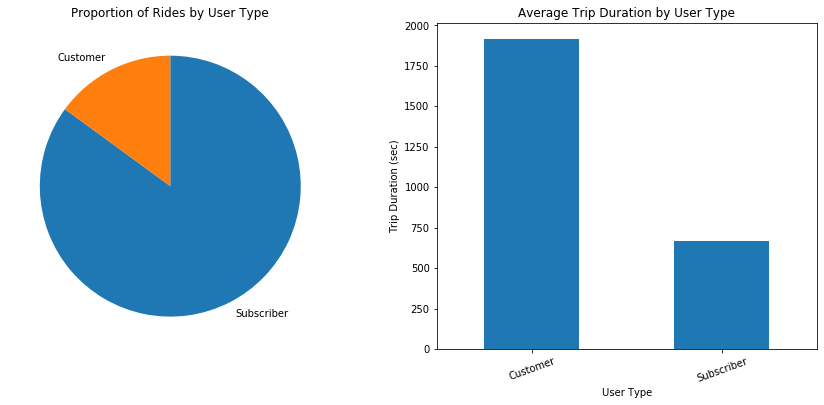

In [89]:
# average ride duration broken into user types
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90,
       counterclock=False)
plt.title('Proportion of Rides by User Type')

plt.subplot(1,2,2)
user.plot(kind='bar')
plt.ylabel('Trip Duration (sec)')
plt.xlabel('User Type')
plt.xticks(rotation = 20)
plt.title("Average Trip Duration by User Type")

(-800, 10000)

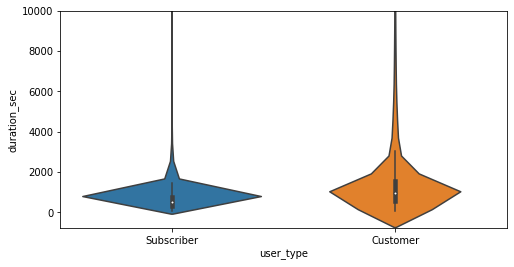

In [90]:
# with ylim to explore trends within main data
plt.figure(figsize=(8,4))

sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_sec')
plt.ylim((-800,10000))

**Subscriber ride duration distrubtion is much more concentrated around the mean.**

- Perhaps because these riders are using bikes more for daily work commutes not longer tourist trips.

In [91]:
df_clean.groupby('user_type').describe()

duration_sec                                                        \
                  count         mean          std   min    25%    50%     75%   
user_type                                                                       
Customer       276959.0  1918.298532  5020.580956  61.0  581.0  946.0  1566.0   
Subscriber    1574991.0   665.668655  1329.790060  61.0  330.0  515.0   783.0   

                    start_station_id              ... month        \
                max            count        mean  ...   75%   max   
user_type                                         ...               
Customer    86366.0         276959.0  112.131265  ...   9.0  12.0   
Subscriber  86281.0        1574991.0  121.000888  ...  10.0  12.0   

           start_time_hour                                                    
                     count       mean       std  min   25%   50%   75%   max  
user_type                                                                     
Customer          276959.0  14.077275  4.296092  0.0  11.0  14.0  17.0  23.0  
Subscriber       1574991.0  13.407341  4.809250  0.0   9.0  14.0  17.0  23.0  

[2 rows x 80 columns]

### Ride duration by user type

The average customer ride duration is nearly triple that of subscribers.

The average ride duration for a customer is 32 mins with a standard deviation of 84 minutes.

Whereas for a subscriber the average ride duration is 11 mins with a standard deviation of only 22 minutes.

**Marginal Cost/Benefit**

The marginal cost of a ride diminishes as time increases for the customer paying by the minute.

Whereas there is no marginal cost or benefit related to a subscribers ride. The cost is 'sunk' and has no effect on rides.

Another factor could be that customers are more likely tourists who are much more likely to spend longer periods of time on the bikes as they have unlimited free time.

### Relationship between Month and Ride Duration

Hypothesise that ride durations would be shorter in the winter months vs summer months

In [92]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,start_time_month_name,start_time_weekday,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1,January,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1,January,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1,January,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1,January,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,1,January,Wed,19


In [50]:
month = df_clean.groupby('month')['duration_sec'].mean()

Text(0.5, 1.0, 'Monthly Variation in Ride Duration')

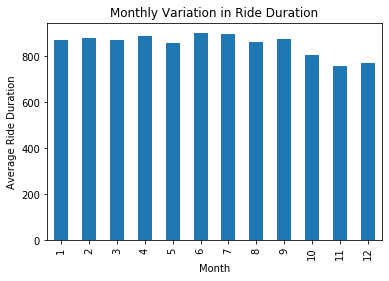

In [51]:
plt.figure(figsize=(6, 4))

month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration')
plt.title('Monthly Variation in Ride Duration')

(0, 3000)

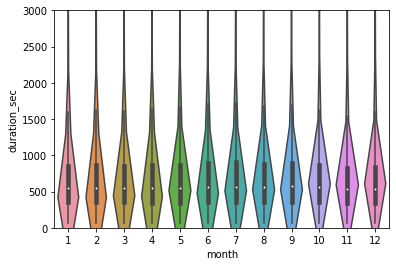

In [52]:
# with ylim to explore trends within main data
sb.violinplot(data = df_clean, x = 'month', y = 'duration_sec')
plt.ylim((0,3000))

In [53]:
month.max() - month.min()

144.23602224641775

**The difference in average ride duration (minutes) between the best summer month (June) and the worst winter month (December) is only 2.4 minutes**

This could be explained by the fact that San Francisco has an extremely temperate, year-round climate.

You might expect this difference to be greater in a city with more seasonal weather variability.

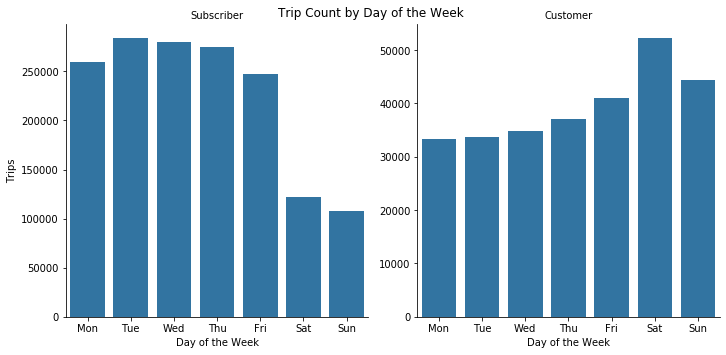

In [94]:
# day of week ride counts per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Day of the Week", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Trip Count by Day of the Week');

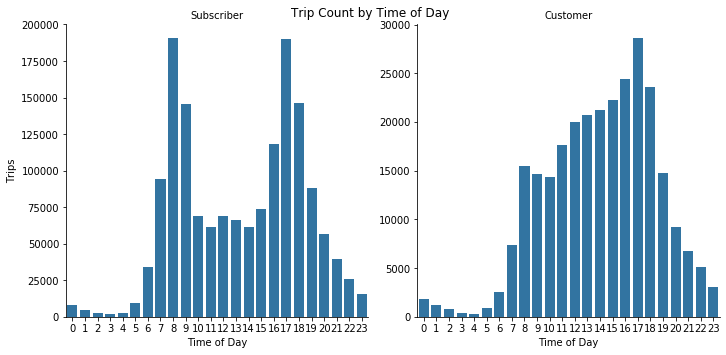

In [95]:
# hourly usege of the bike sharing system per user type

g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Time of Day", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Trip Count by Time of Day');

### **Importing New York City Citibike data to compare with San Francisco**

In [99]:
# importing Jan, June, July & December to compare seasonal variation
citi_1 = pd.read_csv('201801-citibike-tripdata.csv')
citi_1 = citi_1.sample(frac=0.3, replace=True, random_state=1)
citi_2 = pd.read_csv('201802-citibike-tripdata.csv')
citi_2 = citi_2.sample(frac=0.3, replace=True, random_state=1)
citi_3 = pd.read_csv('201803-citibike-tripdata.csv')
citi_3 = citi_3.sample(frac=0.3, replace=True, random_state=1)
citi_4 = pd.read_csv('201804-citibike-tripdata.csv')
citi_4 = citi_4.sample(frac=0.3, replace=True, random_state=1)
citi_5 = pd.read_csv('201805-citibike-tripdata.csv')
citi_5 = citi_5.sample(frac=0.3, replace=True, random_state=1)
citi_6 = pd.read_csv('201806-citibike-tripdata.csv')
citi_6 = citi_6.sample(frac=0.3, replace=True, random_state=1)
citi_7 = pd.read_csv('201807-citibike-tripdata.csv')
citi_7 = citi_7.sample(frac=0.3, replace=True, random_state=1)
citi_8 = pd.read_csv('201808-citibike-tripdata.csv')
citi_8 = citi_8.sample(frac=0.3, replace=True, random_state=1)
citi_9 = pd.read_csv('201809-citibike-tripdata.csv')
citi_9 = citi_9.sample(frac=0.3, replace=True, random_state=1)
citi_10 = pd.read_csv('201810-citibike-tripdata.csv')
citi_10 = citi_10.sample(frac=0.3, replace=True, random_state=1)
citi_11 = pd.read_csv('201811-citibike-tripdata.csv')
citi_11 = citi_11.sample(frac=0.3, replace=True, random_state=1)
citi_12 = pd.read_csv('201812-citibike-tripdata.csv')
citi_12 = citi_12.sample(frac=0.3, replace=True, random_state=1)

In [100]:
frames = [citi_1, citi_2, citi_3, citi_4, citi_5, citi_6, citi_7, citi_8, citi_9, citi_10, citi_11, citi_12]
df_citi = pd.concat(frames)

In [101]:
df_citi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5264502 entries, 128037 to 933772
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 642.6+ MB


In [102]:
# check for rows with null values
df_citi.isna().sum().sum()

3176

In [103]:
# check for shape to see if null's negligible
df_citi.shape[0]

5264502

In [104]:
# drop all rows with null values
df_citi = df_citi.dropna()

In [105]:
# change start & stop times to datetime to manipulate
df_citi['starttime'] = pd.to_datetime(df_citi['starttime'])
df_citi['stoptime'] = pd.to_datetime(df_citi['stoptime'])

In [106]:
# add month variable for exploration
df_citi['month'] = pd.DatetimeIndex(df_citi['starttime']).month

In [83]:
df_citi.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,1


In [84]:
df_citi.tail(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month
1016503,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,Central Park West & W 100 St,40.794067,-73.962868,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,30818,Customer,1969,0,12
1016504,2459,2018-12-31 23:59:51.085,2019-01-01 00:40:50.880,128.0,MacDougal St & Prince St,40.727103,-74.002971,402.0,Broadway & E 22 St,40.740343,-73.989551,34775,Subscriber,1996,2,12


In [107]:
# extract start time month name
df_citi['start_time_month_name'] = df_citi['starttime'].dt.strftime('%B')

In [108]:
# extract day of the week
df_citi['start_time_weekday'] = df_citi['starttime'].dt.strftime('%a')

In [109]:
# extract time of day
df_citi['start_time_hour'] = df_citi['starttime'].dt.hour

In [110]:
df_citi.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,start_time_month_name,start_time_weekday,start_time_hour
128037,830,2018-01-28 11:56:43.393,2018-01-28 12:10:33.609,326.0,E 11 St & 1 Ave,40.729538,-73.984267,238.0,Bank St & Washington St,40.736197,-74.008592,21256,Subscriber,1958,2,1,January,Sun,11
491755,126,2018-01-18 09:31:57.538,2018-01-18 09:34:04.319,3113.0,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940,3112.0,Milton St & Franklin St,40.729060,-73.957790,33220,Subscriber,1989,1,1,January,Thu,9
470924,653,2018-01-05 18:10:32.934,2018-01-05 18:21:26.266,3063.0,Nostrand Ave & Myrtle Ave,40.695270,-73.952381,3075.0,Division Ave & Marcy Ave,40.707087,-73.957968,18633,Subscriber,1979,1,1,January,Fri,18
491263,821,2018-01-28 16:33:27.705,2018-01-28 16:47:08.811,3112.0,Milton St & Franklin St,40.729060,-73.957790,3078.0,Broadway & Roebling St,40.709248,-73.960631,18473,Subscriber,1985,1,1,January,Sun,16
371403,559,2018-01-02 19:23:00.535,2018-01-02 19:32:20.053,503.0,E 20 St & Park Ave,40.738274,-73.987520,254.0,W 11 St & 6 Ave,40.735324,-73.998004,30669,Subscriber,1952,2,1,January,Tue,19


<a id='multi'></a>
# Multivariate Exploration

Analysing by user type, time of day & trip durations

In [1]:
# time of day

base_color = sb.color_palette()[0]
g = sb.catplot(data=df_citi, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "Bike Trips")
g.fig.suptitle('Bike Usage by Time of Day');

NameError: name 'sb' is not defined

**We see the same bimodality in New York as was observed in San Francisco**

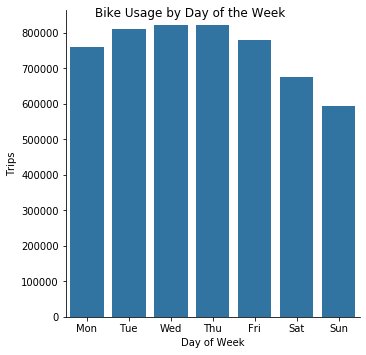

In [112]:
# day of the week usage
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_citi, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Day of Week", "Trips")
g.fig.suptitle('Bike Usage by Day of the Week');

**We also see a drop off in ridership on the weekends however this is much less severe**

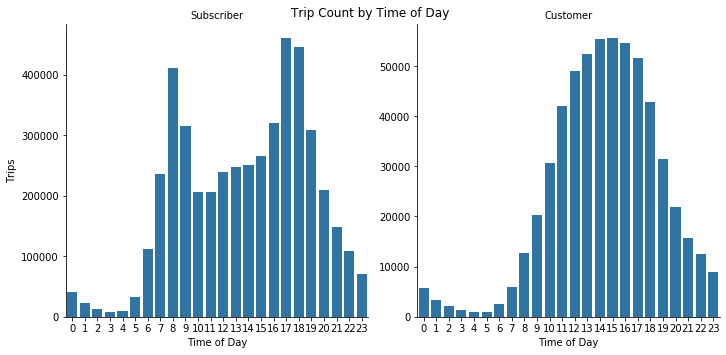

In [114]:
# hourly usege of the bike sharing system per user type

g = sb.catplot(data=df_citi, x='start_time_hour', col="usertype", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Time of Day", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Trip Count by Time of Day');

<Figure size 432x288 with 0 Axes>

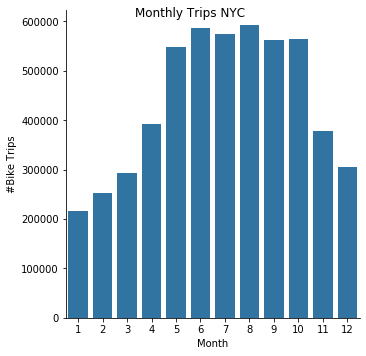

In [120]:
plt.figure()

g = sb.catplot(data=df_citi, x='month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly Trips NYC');

In [121]:
df_citi.to_csv('df_nyc.csv')

In [68]:
month_citi = df_citi.groupby('month')['tripduration'].mean()
citi = pd.DataFrame(month_citi)

,difference,city
month,,
1,384.508925,NYC
6,0.000000,NYC
7,136.775547,NYC
12,388.311253,NYC


In [69]:
sf = pd.DataFrame(month)
sf['difference'] = sf.duration_sec.max() - sf['duration_sec']
sf = sf.drop(sf.index[[1,2,3,4,7,8,9,10]])
sf = sf.drop(['duration_sec'], axis=1)
sf['city'] = 'SF'
sf

,difference,city
month,,
1,29.361873,SF
6,0.000000,SF
7,4.370176,SF
12,131.984387,SF


In [70]:
frames = [sf, citi]
result = pd.concat(frames, keys=['city','difference', 'month'])

In [71]:
result

difference city
           month                 
city       1       29.361873   SF
           6        0.000000   SF
           7        4.370176   SF
           12     131.984387   SF
difference 1      384.508925  NYC
           6        0.000000  NYC
           7      136.775547  NYC
           12     388.311253  NYC

([<matplotlib.axis.XTick at 0x1a7710ec90>,
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x504 with 0 Axes>

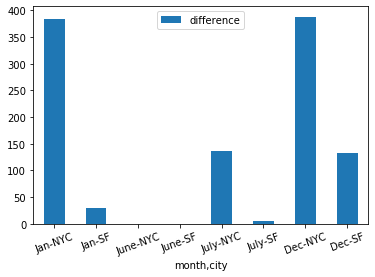

In [165]:
plt.figure(figsize=(15,7))
df2 = result.groupby(['month', 'city'])['difference'].mean()
df2 = pd.DataFrame(df2)
df2.plot(kind='bar', stacked=True)
plt.xticks([0, 1, 2,3,4,5,6,7], ['Jan-NYC', 'Jan-SF', 'June-NYC','June-SF','July-NYC','July-SF','Dec-NYC','Dec-SF'], rotation=20)

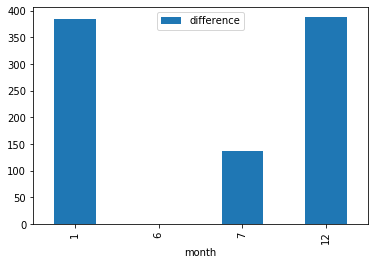

In [168]:
citi.plot(kind='bar')

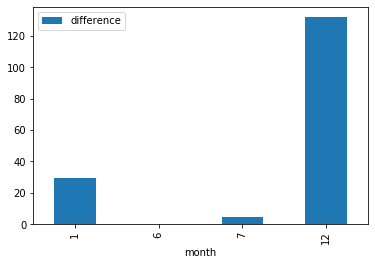

In [169]:
sf.plot(kind='bar')

In [170]:
month_citi.max() - month_citi.min()

388.31125334853584

In [171]:
388.25 / 60 

6.470833333333333

**Summer vs winter difference in monthly average trip duration for New York is 6.5 minutes**

- Much larger seasonal difference than san francisco, which is 2.2 minutes
- Explained by much larger seasonal temperature variations
- Snowfall in winter likely also contributes

**Seasonal Temp. Variation Correlation**

- Peak summer to peak winter temp. variation (celsius): 
- NYC = 25 degrees
- San Francisco = 5 degrees
     

**5x difference in seasonal temperature variation is closely related to the 3x seasonal trip duration change for the two cities.**

In [172]:
df_citi.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,1


### Relationship between Gender and Trip Durations for NYC

In [173]:
gender = df_citi.groupby('gender')['tripduration'].mean()

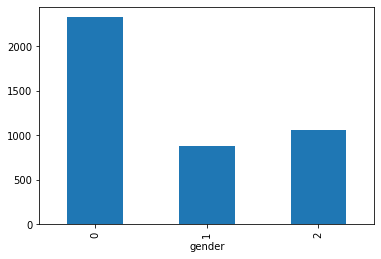

In [174]:
gender.plot(kind='bar')

In [175]:
df_citi.groupby('usertype').describe()

tripduration                                                  \
                  count         mean           std   min    25%     50%   
usertype                                                                  
Customer       626389.0  2885.064709  55935.385279  61.0  816.0  1289.0   
Subscriber    4975749.0   813.128669  10968.625893  61.0  342.0   561.0   

                               start station id               ... gender       \
               75%         max            count         mean  ...    75%  max   
usertype                                                      ...               
Customer    1768.0  19510049.0         626389.0  1739.045494  ...    1.0  2.0   
Subscriber   947.0   8121483.0        4975749.0  1576.319745  ...    1.0  2.0   

                month                                                
                count      mean       std  min  25%  50%  75%   max  
usertype                                                             
Customer     626389.0  6.863459  2.025440  1.0  6.0  7.0  7.0  12.0  
Subscriber  4975749.0  6.779036  3.183355  1.0  6.0  7.0  7.0  12.0  

[2 rows x 88 columns]

**The difference between average ride durations for customers vs subscribers**

- Is far greater in New York
- Mean for customers is 43 minutes vs 13 minutes for subscribers

## Differences between San Francisco and New York

**Average customer minus subscriber (difference) ride duration** 

- NY = 30 minutes
- SF = 21 minutes

**Average summer vs winter ride duration** 

- NY = 6.4 minutes
- SF = 1 minute

**Customer/subscriber ride duration difference is much larger in NYC, perhaps owing to Central Park, the many bridges and the number of tourist visitors.**

In [ ]:
# Setting the weekday order
df_sf['start_time_weekday'] = pd.Categorical(df_sf['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('San Francisco Hourly Usage by User Type & Day of Week', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_sf.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Subscriber")
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_sf.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Customer")
plt.xlabel('Weekday')
plt.ylabel('');

In [ ]:
# Setting the weekday order
df_nyc['start_time_weekday'] = pd.Categorical(df_nyc['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('NYC Hourly Usage by User Type & Weekday', fontsize=15, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_nyc.query('usertype == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Subscriber")
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_nyc.query('usertype == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Customer")
plt.xlabel('Weekday')
plt.ylabel('');

In [ ]:
# Setting the weekday order
df_sf['start_time_weekday'] = pd.Categorical(df_sf['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

df_nyc['start_time_weekday'] = pd.Categorical(df_nyc['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Subscriber Hourly Usage by Day of Week', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_sf.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("San Francisco")
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for customers
plt.subplot(1, 2, 2)
df_customer = df_nyc.query('usertype == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("NYC")
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')